In [32]:
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score


In [5]:
data=read_csv("diabetes.csv")

In [8]:
data.head(4)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [20]:
array = data.values
X = array[:, 0:-1]
Y = array[:, -1]


In [21]:
scaler = MinMaxScaler()
scaler.fit(X)

X=scaler.transform(X)

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

# chose the best value of k

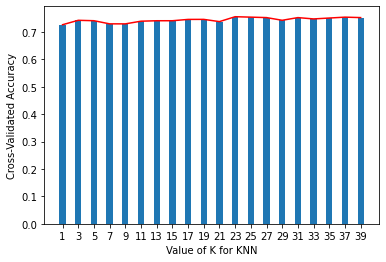

In [29]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores,color="red")

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

In [31]:
scores=pd.DataFrame()
scores["K_values"]=k_range
scores["Scores"]=k_scores
scores.sort_values(["Scores"],ascending=False)

,K_values,Scores
11,23,0.755632
12,25,0.754072
18,37,0.754045
19,39,0.752459
13,27,0.752433
15,31,0.752380
17,35,0.750820
16,33,0.747567
9,19,0.745928
8,17,0.745796


# build final model

In [40]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
accuracy_score(y_test,pred)

0.7402597402597403

In [41]:
from pickle import dump
from pickle import load

dump(knn, open('knn.sav', 'wb'))

In [42]:
loaded_model = load(open('knn.sav', 'rb'))
result = loaded_model.score(X, Y)
print(result)

0.76953125


In [43]:
ls


appupdated.py                       knn.sav
diabetes.csv                        pima-indians-diabetes.data (2).csv
knn demo.ipynb


# deploy the model

In [ ]:
!streamlit run appupdated.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8503
  Network URL: http://172.20.10.3:8503


  A new version of Streamlit is available.

  See what's new at https://discuss.streamlit.io/c/announcements

  Enter the following command to upgrade:
  $ pip install streamlit --upgrade

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
